In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# inspect engine 
from sqlalchemy import inspect
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
# inspect columns of Table "Measurement"
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('measurement')  
session.query(Measurement.date, Measurement.prcp).limit(10).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01)]

In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [14]:
# Print a date object and datatime obj
print(dt.date.today())
print(dt.datetime(2017, 8, 23))

2023-09-08
2017-08-23 00:00:00


In [15]:
print(dt.datetime.utcnow())
print(dt.datetime(2017, 8, 23))

2023-09-08 22:04:48.438042
2017-08-23 00:00:00


<Axes: xlabel='Date', ylabel='Inches'>

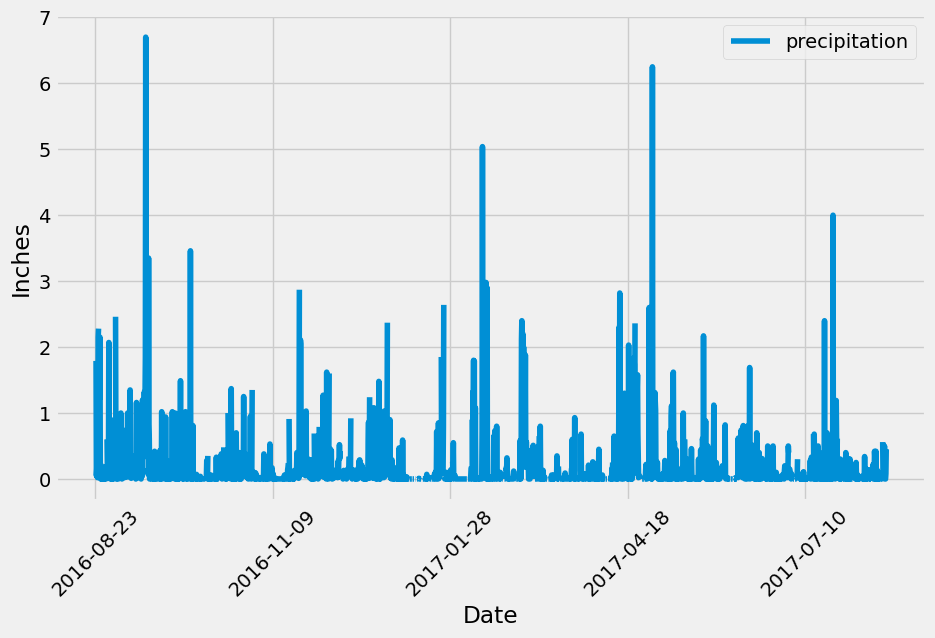

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year, columns=['date','precipitation'])
df.set_index('date',  inplace=True)


# Sort the dataframe by date
df = df.sort_values(by='date')


#Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45, xlabel = 'Date', ylabel='Inches', figsize=(10,6))

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
df = pd.DataFrame(last_year, columns=['date','precipitation'])
df.set_index('date',  inplace=True)
df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [20]:
# Sort the dataframe by date
df = df.sort_values(by='date')
df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


# Exploratory Station Analysis

In [21]:
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [22]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
columns = inspector.get_columns('station')  
session.query(Station.name, Station.latitude, Station.longitude).limit(10).all()

[('WAIKIKI 717.2, HI US', 21.2716, -157.8168),
 ('KANEOHE 838.1, HI US', 21.4234, -157.8015),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374),
 ('PEARL CITY, HI US', 21.3934, -157.9751),
 ('UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139),
 ('WAIHEE 837.5, HI US', 21.45167, -157.84888999999998),
 ('HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992),
 ('MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025)]

In [24]:
# Total number of station in the dataset
session.query(Station.station).count()

9

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()


In [27]:
min_temp, max_temp, avg_temp

((54.0,), (85.0,), (71.66378066378067,))

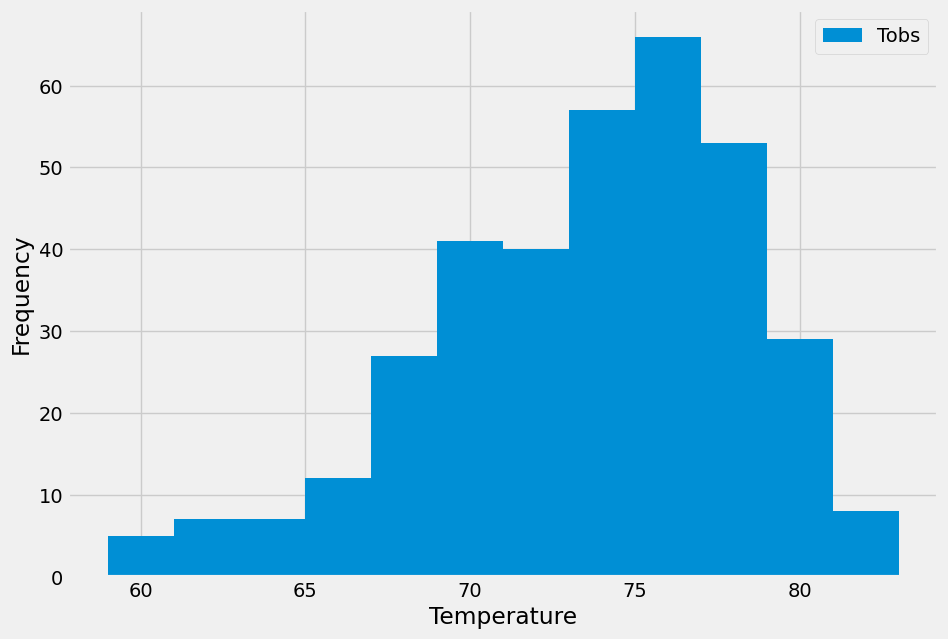

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= first_date).all()
station_df = pd.DataFrame(data, columns=['Tobs'])

station_df.plot.hist(bins=12, figsize=(10, 7))
plt.xlabel('Temperature')
plt.show()

# Close Session

In [29]:
# Close Session
session.close()